In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel ('Ian_CD31805.05.2022._Fatma.xlsx')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 57 columns):
 #   Column                                                        Non-Null Count  Dtype         
---  ------                                                        --------------  -----         
 0   NIP                                                           40 non-null     int64         
 1   date de TP                                                    40 non-null     datetime64[ns]
 2   Super Urgence                                                 40 non-null     int64         
 3   BMI                                                           40 non-null     float64       
 4   BMI< ou egal 18                                               40 non-null     int64         
 5   BMI≥30                                                        40 non-null     int64         
 6   BMI≥25                                                        40 non-null     int64         
 7   Age       

In [4]:
df=df.fillna(0)
df.columns = df.columns.str.replace(' ','_')
df = df.rename(columns = {"rejet_aigu_cellulaire_dans_l'année":'rejet_aigu_cellulaire_dans_lannée'})

df['date_de_rejet_aigu_cellulaire']=pd.factorize(df['date_de_rejet_aigu_cellulaire'])[0]
df['grade_RAC']=pd.factorize(df['grade_RAC'])[0]
df['date_de_TP']=pd.factorize(df['date_de_TP'])[0]

In [5]:
from sklearn.preprocessing import StandardScaler

df_scale=pd.DataFrame(StandardScaler().fit_transform(df))
df_scale.index=df.index
df_scale.columns=df.columns

In [6]:
data=df_scale.loc[:,['CD31_H24','PaO2/FiO2_H24', 'SOFA_respiratoire_H24', 'CD31_H48', 'PaO2/FiO2_H48','SOFA_respiratoire_H48',
        'CD31_H72', 'PaO2/FiO2_H72', 'SOFA_respiratoire_H72']]


labels=np.zeros(40)
labels[33:] = 1

data

,CD31_H24,PaO2/FiO2_H24,SOFA_respiratoire_H24,CD31_H48,PaO2/FiO2_H48,SOFA_respiratoire_H48,CD31_H72,PaO2/FiO2_H72,SOFA_respiratoire_H72
0,1.467067,-0.841760,0.693889,-0.486515,-0.728181,0.424959,-0.781483,-1.317307,0.802955
1,0.334375,-0.964677,1.405569,-0.149373,-0.437103,0.424959,-0.371089,-0.258397,-0.344124
2,1.931058,-0.938338,0.693889,-1.294867,0.339106,-0.469692,-0.543635,-0.327456,-0.344124
3,-0.037702,-0.841760,0.693889,-0.477723,-0.592345,0.424959,-0.481501,-0.810872,0.802955
4,-0.257592,-0.850540,0.693889,-0.154248,-1.155096,1.319610,-0.302770,-1.041070,0.802955
5,-0.595999,0.475205,-0.729473,-1.294867,0.678698,-0.469692,-0.711944,0.719944,-0.344124
6,0.620421,1.177586,-1.441153,0.146034,1.018289,-1.364343,0.052253,0.731454,-0.344124
7,-0.062870,0.791276,-0.729473,-0.550528,1.163828,-1.364343,-0.960841,0.225018,-0.344124
8,-0.704044,-0.385212,-0.017792,-0.735183,-0.029593,-0.469692,-0.958856,0.581825,-0.344124
9,-0.575751,-0.859320,0.693889,-0.333646,-0.631155,0.424959,-0.525715,-0.143298,-0.344124


In [ ]:
point_clouds = np.asarray(
    [
       df_scale.query("rejet_aigu_cellulaire_dans_lannée == @df")[[ 'CD31_H24',
       'PaO2/FiO2_H24', 'SOFA_respiratoire_H24', 'CD31_H48', 'PaO2/FiO2_H48',
       'SOFA_respiratoire_H48', 'CD31_H72', 'PaO2/FiO2_H72',
       'SOFA_respiratoire_H72'
       ]].values
        for df in df_scale["rejet_aigu_cellulaire_dans_lannée"].unique()
    ]
)


In [8]:
point_clouds.shape

(2,)

In [9]:
point_clouds[0].shape,point_clouds[1].shape

((33, 9), (7, 9))

In [10]:
P0 = point_clouds[0].tolist()
P1=point_clouds[1].tolist()

P0 = np.reshape(P0, (len(P0),3, 3)) 
P1 = np.reshape(P1, (len(P1),3, 3))
P0.shape,P1.shape

((33, 3, 3), (7, 3, 3))

In [11]:
P = np.concatenate((P0, P1), axis=0)
P.shape

(40, 3, 3)

In [12]:
from gtda.plotting import plot_point_cloud

plot_point_cloud(P[0])

# Extract topological features

## Filtration Alpha complexe

In [13]:
import gudhi
alpha_complex = gudhi.AlphaComplex(P[0])
simplex_tree = alpha_complex.create_simplex_tree()
result_str = 'Alpha complex is of dimension ' + repr(simplex_tree.dimension()) + ' - ' + \
    repr(simplex_tree.num_simplices()) + ' simplices - ' + \
    repr(simplex_tree.num_vertices()) + ' vertices.'
print(result_str)


Alpha complex is of dimension 2 - 7 simplices - 3 vertices.


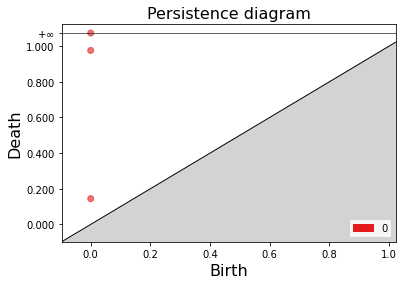

In [14]:
diag = simplex_tree.persistence()
gudhi.plot_persistence_diagram(diag,legend=True)
plt.show()

## Filtration de Rips

In [15]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.patches as mpatches
from matplotlib.collections import PatchCollection

def plot_rips_complex(data, R, label="data", col=0, maxdim=2,a=8):
    tab10 = cm.get_cmap('tab10')

    fig, ax = plt.subplots(figsize=(a, a))
    ax.set_title(label)
    ax.scatter(
        data[:, 0], data[:, 1], label=label,
        s=8, alpha=1, c=np.array(tab10([col] * len(data)))
    )

    for xy in data:
        ax.add_patch(mpatches.Circle(xy, radius=R, fc='none', ec=tab10(col), alpha=0.9))

    for i, xy in enumerate(data):
        if maxdim >=1:
            for j in range(i + 1, len(data)):
                pq = data[j]
                if (xy != pq).all() and (np.linalg.norm(xy - pq) <= R):
                    pts = np.array([xy, pq])
                    ax.plot(pts[:, 0], pts[:, 1], color=tab10(col), alpha=1, linewidth=2.5)
                if maxdim == 2:
                    for k in range(j + 1, len(data)):
                        ab = data[k]
                        if ((ab != pq).all()
                                and (np.linalg.norm(xy - pq) <= R)
                                and (np.linalg.norm(xy - ab) <= R)
                                and (np.linalg.norm(pq - ab) <= R)
                        ):
                            pts = np.array([xy, pq, ab])
                            ax.fill(pts[:, 0], pts[:, 1], facecolor=tab10(col), alpha=0.4)
                        pass

    plt.axis('equal')
    plt.tight_layout()
    plt.show()
    pass




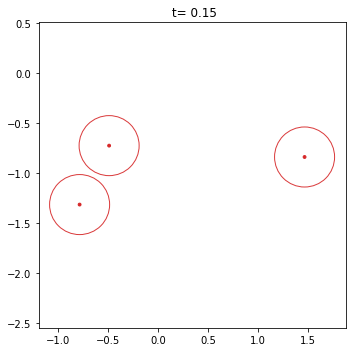

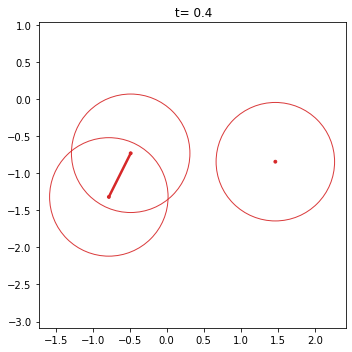

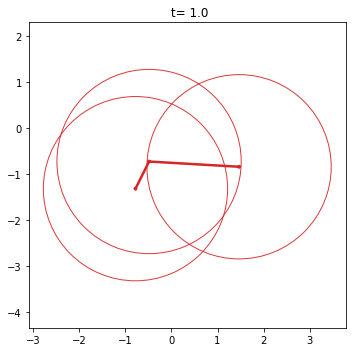

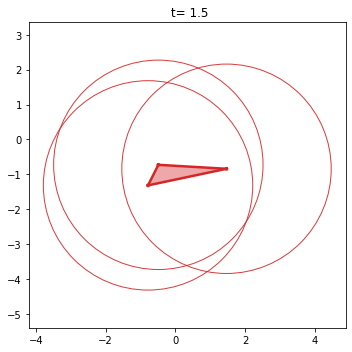

In [16]:
a=[0.3,0.8,2,3]
for i in a:
    plot_rips_complex(P[0],label=' t= '+str(i/2),col=3, R=i ,maxdim=2,a=5)
    plt.show()


In [ ]:
from gtda.homology import VietorisRipsPersistence

persistence = VietorisRipsPersistence(metric = 'euclidean',homology_dimensions=[0,1,2],n_jobs=-1,collapse_edges=True)

persistence_diagrams = persistence.fit_transform(P)

In [18]:
persistence.plot(persistence_diagrams,sample=0)

# Distances between diagrams

In [19]:
from gtda.diagrams import PairwiseDistance

PD = PairwiseDistance(metric='bottleneck',
                      order=None)

X_distance_L = PD.fit_transform(persistence_diagrams)
X_distance_L.shape

(40, 40, 3)

In [20]:
from gtda.plotting import plot_heatmap

plot_heatmap(X_distance_L[:, :, 0], colorscale='blues')


# Betti curve

In [21]:
from gtda.diagrams import BettiCurve

BT= BettiCurve()
bt=BT.fit_transform(persistence_diagrams)
BT.plot(bt,sample=0)

# Persistence landscape

In [22]:
from gtda.diagrams import PersistenceLandscape

PL = PersistenceLandscape(n_layers=3)
pl=PL.fit_transform(persistence_diagrams)
PL.plot(pl)

# Silhouette

In [23]:
from gtda.diagrams import  Silhouette

SL=Silhouette()
sl=SL.fit_transform(persistence_diagrams)
SL.plot(sl,sample=0)

# Image persistence

In [ ]:
from ripser import Rips
from persim import PersistenceImager

rips = Rips()
dgms = rips.fit_transform(P[0])
pimgr = PersistenceImager(birth_range=(0,4),pers_range=(0,4),pixel_size=0.01)

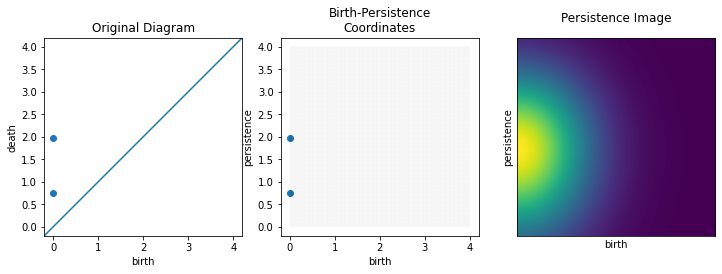

In [25]:
for i in range(1):
    dg=dgms[i]
    if i==0:
        dg=dgms[i][:-1]
    pimgs = pimgr.transform(dg, skew=True)
    fig, axs = plt.subplots(1, 3, figsize=(10,10))

    axs[0].set_title("Original Diagram")
    pimgr.plot_diagram(dg, skew=False, ax=axs[0])

    axs[1].set_title("Birth-Persistence\nCoordinates")
    pimgr.plot_diagram(dg, skew=True, ax=axs[1])

    axs[2].set_title("Persistence Image")
    pimgr.plot_image(pimgs, ax=axs[2])

    plt.tight_layout()
    


# Entropy

In [26]:
from gtda.diagrams import PersistenceEntropy

persistence_entropy = PersistenceEntropy(normalize=True)

X= persistence_entropy.fit_transform(persistence_diagrams)

X.shape

(40, 3)

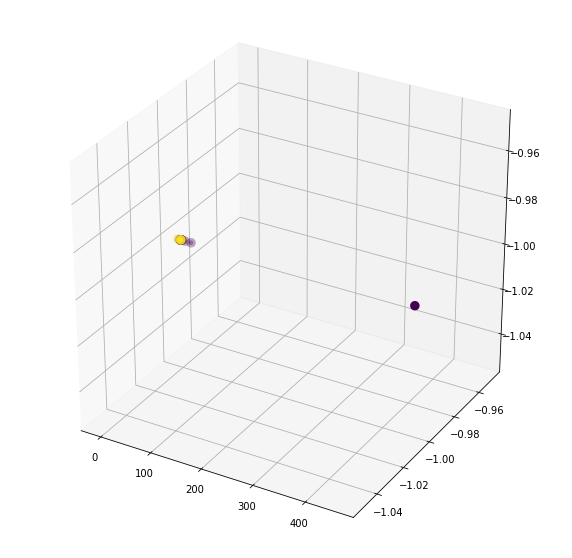

In [27]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.scatter3D(X[:,0],X[:,1], X[:,2], c=labels, linewidth=5)

# Number of points

In [28]:
from gtda.diagrams import NumberOfPoints

NumberOfPoints().fit_transform(persistence_diagrams)

array([[2, 0, 0],
       [2, 0, 0],
       [2, 0, 0],
       [2, 0, 0],
       [2, 0, 0],
       [2, 0, 0],
       [2, 0, 0],
       [2, 0, 0],
       [2, 0, 0],
       [2, 0, 0],
       [2, 0, 0],
       [2, 0, 0],
       [2, 0, 0],
       [2, 0, 0],
       [2, 0, 0],
       [2, 0, 0],
       [2, 0, 0],
       [2, 0, 0],
       [2, 0, 0],
       [2, 0, 0],
       [2, 0, 0],
       [2, 0, 0],
       [2, 0, 0],
       [2, 0, 0],
       [2, 0, 0],
       [2, 0, 0],
       [2, 0, 0],
       [2, 0, 0],
       [2, 0, 0],
       [2, 0, 0],
       [2, 0, 0],
       [2, 0, 0],
       [2, 0, 0],
       [2, 0, 0],
       [2, 0, 0],
       [2, 0, 0],
       [2, 0, 0],
       [2, 0, 0],
       [2, 0, 0],
       [2, 0, 0]])

# Amplitude

## Bottleneck

In [29]:
from gtda.diagrams import Amplitude

Amplitude(metric='bottleneck').fit_transform(persistence_diagrams)

array([[0.98763704, 0.        , 0.        ],
       [0.60703033, 0.        , 0.        ],
       [1.37611341, 0.        , 0.        ],
       [0.27476948, 0.        , 0.        ],
       [0.29885924, 0.        , 0.        ],
       [0.53195781, 0.        , 0.        ],
       [0.33152249, 0.        , 0.        ],
       [0.46539858, 0.        , 0.        ],
       [0.49715683, 0.        , 0.        ],
       [1.17496276, 0.        , 0.        ],
       [0.53129941, 0.        , 0.        ],
       [1.02619982, 0.        , 0.        ],
       [0.6715796 , 0.        , 0.        ],
       [0.50903398, 0.        , 0.        ],
       [0.83056933, 0.        , 0.        ],
       [0.80288219, 0.        , 0.        ],
       [1.06345296, 0.        , 0.        ],
       [0.71397734, 0.        , 0.        ],
       [1.50790179, 0.        , 0.        ],
       [0.57727283, 0.        , 0.        ],
       [0.26697755, 0.        , 0.        ],
       [2.36517   , 0.        , 0.        ],
       [0.

## Wasserstein

In [30]:
Amplitude(metric='wasserstein').fit_transform(persistence_diagrams)

array([[1.05814266, 0.        , 0.        ],
       [0.73255121, 0.        , 0.        ],
       [1.46621741, 0.        , 0.        ],
       [0.29674535, 0.        , 0.        ],
       [0.3804936 , 0.        , 0.        ],
       [0.58911699, 0.        , 0.        ],
       [0.43911183, 0.        , 0.        ],
       [0.51219636, 0.        , 0.        ],
       [0.58536516, 0.        , 0.        ],
       [1.18135278, 0.        , 0.        ],
       [0.70477646, 0.        , 0.        ],
       [1.13847776, 0.        , 0.        ],
       [0.75300638, 0.        , 0.        ],
       [0.52005573, 0.        , 0.        ],
       [0.99134607, 0.        , 0.        ],
       [0.81009136, 0.        , 0.        ],
       [1.35666868, 0.        , 0.        ],
       [0.92806209, 0.        , 0.        ],
       [1.69758334, 0.        , 0.        ],
       [0.80716756, 0.        , 0.        ],
       [0.36530586, 0.        , 0.        ],
       [2.39874361, 0.        , 0.        ],
       [1.